✅ Paso 1: Organizar los archivos/ 
🟢 Paso 2: Cargar el archivo usu_individual_T123.txt

In [4]:
# 📦 Cargar librerías necesarias
import pandas as pd

# 📁 Cargar archivo de datos desde la carpeta raw
ruta = '../data/raw/usu_individual_T123.txt'

# 🔍 Leer el archivo con separador punto y coma y codificación latina
df = pd.read_csv(ruta, sep=';', encoding='latin1')

# 👁️ Ver forma (filas, columnas) del dataset
print("Dimensiones del dataset:", df.shape)

# 👁️ Ver primeras filas para tener una idea general
df.head()

Dimensiones del dataset: (48638, 177)


C:\Users\Bel\AppData\Local\Temp\ipykernel_4140\1232321504.py:8: DtypeWarning: Columns (102) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta, sep=';', encoding='latin1')


,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNORVWHLMKOCDEOHCH00720228,2023,1,1,5,0,44,N,91,112,...,10.0,9,79700,6,6.0,5,NaN,7.0,5,133
1,TQRMNOPSTHKMKPCDEOHCH00781447,2023,1,1,1,1,44,N,91,190,...,6.0,5,180000,9,10.0,9,NaN,10.0,9,200
2,TQRMNOQSXHMOKRCDEOHCH00803177,2023,1,1,1,1,44,N,91,134,...,8.0,8,145000,9,9.0,8,NaN,9.0,8,140
3,TQRMNOQSXHMOKRCDEOHCH00803177,2023,1,1,2,1,44,N,91,134,...,8.0,8,145000,9,9.0,8,NaN,9.0,8,140
4,TQRMNOQYTHMNKSCDEOHCH00803178,2023,1,1,1,1,44,N,91,120,...,12.0,12,0,12,12.0,12,NaN,12.0,12,0


🟡 Paso 3: Exploración inicial (EDA)

In [7]:
# 🔎 Ver nombres de las primeras 20 columnas
print(df.columns[:20])

# 🔍 Ver tipo de datos y valores nulos
print("\nTipos de datos:")
print(df.dtypes.head(10))

print("\nValores nulos por columna:")
print(df.isnull().sum().head(10))

# 📊 Ver distribución de la variable 'ESTADO'
print("\nDistribución de la variable ESTADO:")
print(df['ESTADO'].value_counts(dropna=False))

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH05',
       'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12'],
      dtype='object')

Tipos de datos:
CODUSU        object
ANO4           int64
TRIMESTRE      int64
NRO_HOGAR      int64
COMPONENTE     int64
H15            int64
REGION         int64
MAS_500       object
AGLOMERADO     int64
PONDERA        int64
dtype: object

Valores nulos por columna:
CODUSU        0
ANO4          0
TRIMESTRE     0
NRO_HOGAR     0
COMPONENTE    0
H15           0
REGION        0
MAS_500       0
AGLOMERADO    0
PONDERA       0
dtype: int64

Distribución de la variable ESTADO:
ESTADO
1    21518
3    19426
4     6316
2     1322
0       56
Name: count, dtype: int64


🟡 Paso 4: Filtrar población activa y seleccionar columnas

In [10]:
# Filtramos solo población activa (ocupados y desocupados)
df_actividad = df[df['ESTADO'].isin([1, 2])].copy()

# Verificamos que se haya filtrado correctamente
print("Distribución después del filtrado:")
print(df_actividad['ESTADO'].value_counts())

# Reemplazamos 'P21' por 'CH06' (edad)
columnas_utiles = ['CH04', 'CH06', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP']
df_actividad = df_actividad[columnas_utiles]

# Renombramos las columnas para más claridad
df_actividad.columns = ['sexo', 'edad', 'nivel_educativo', 'estado', 'categoria_ocupacional']

# Mostramos las primeras filas
df_actividad.head()

Distribución después del filtrado:
ESTADO
1    21518
2     1322
Name: count, dtype: int64


,sexo,edad,nivel_educativo,estado,categoria_ocupacional
2,2,30,4,1,3
3,1,32,4,1,3
4,1,45,3,1,3
5,2,37,3,1,3
10,1,35,4,1,3


In [12]:
# Ver todas las columnas por nombre y posición
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

0: CODUSU
1: ANO4
2: TRIMESTRE
3: NRO_HOGAR
4: COMPONENTE
5: H15
6: REGION
7: MAS_500
8: AGLOMERADO
9: PONDERA
10: CH03
11: CH04
12: CH05
13: CH06
14: CH07
15: CH08
16: CH09
17: CH10
18: CH11
19: CH12
20: CH13
21: CH14
22: CH15
23: CH15_COD
24: CH16
25: CH16_COD
26: NIVEL_ED
27: ESTADO
28: CAT_OCUP
29: CAT_INAC
30: IMPUTA
31: PP02C1
32: PP02C2
33: PP02C3
34: PP02C4
35: PP02C5
36: PP02C6
37: PP02C7
38: PP02C8
39: PP02E
40: PP02H
41: PP02I
42: PP03C
43: PP03D
44: PP3E_TOT
45: PP3F_TOT
46: PP03G
47: PP03H
48: PP03I
49: PP03J
50: INTENSI
51: PP04A
52: PP04B_COD
53: PP04B1
54: PP04B2
55: PP04B3_MES
56: PP04B3_ANO
57: PP04B3_DIA
58: PP04C
59: PP04C99
60: PP04D_COD
61: PP04G
62: PP05B2_MES
63: PP05B2_ANO
64: PP05B2_DIA
65: PP05C_1
66: PP05C_2
67: PP05C_3
68: PP05E
69: PP05F
70: PP05H
71: PP06A
72: PP06C
73: PP06D
74: PP06E
75: PP06H
76: PP07A
77: PP07C
78: PP07D
79: PP07E
80: PP07F1
81: PP07F2
82: PP07F3
83: PP07F4
84: PP07F5
85: PP07G1
86: PP07G2
87: PP07G3
88: PP07G4
89: PP07G_59
90: PP07H


In [14]:
df[['CH05', 'CH06', 'CH07', 'CH08']].head(10)

,CH05,CH06,CH07,CH08
0,29/10/2015,7,5,1.0
1,29/05/1939,83,4,1.0
2,20/12/1992,30,1,1.0
3,20/08/1990,32,1,1.0
4,02/07/1977,45,2,1.0
5,29/08/1985,37,2,4.0
6,29/09/2004,18,5,4.0
7,02/10/2008,14,5,4.0
8,19/10/2012,10,5,4.0
9,02/07/2014,8,5,4.0


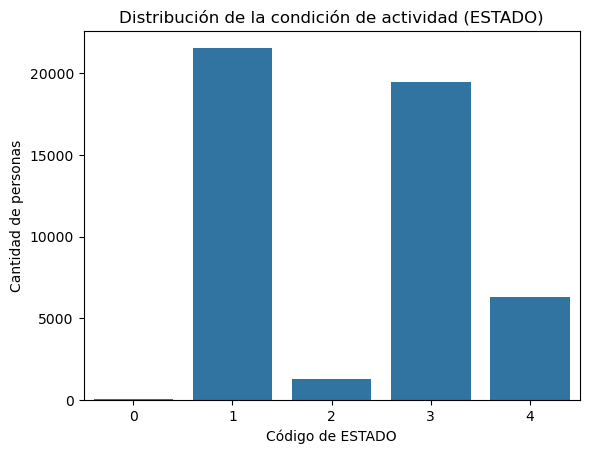

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de barras de la condición laboral
sns.countplot(data=df, x='ESTADO')
plt.title('Distribución de la condición de actividad (ESTADO)')
plt.xlabel('Código de ESTADO')
plt.ylabel('Cantidad de personas')
plt.show()

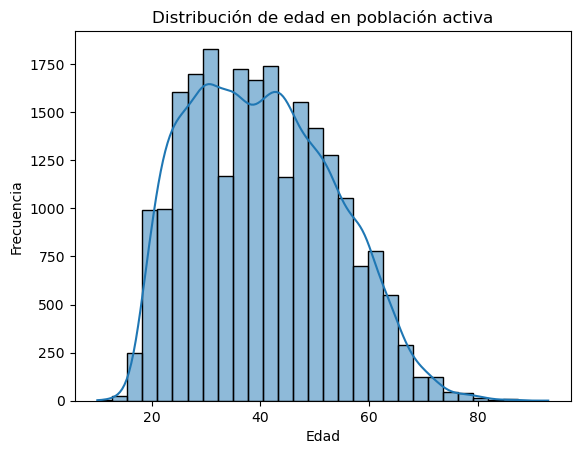

In [23]:
sns.histplot(data=df_actividad, x='edad', bins=30, kde=True)
plt.title('Distribución de edad en población activa')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

🟣 Paso 5: Codificar variables categóricas y crear la variable objetivo

In [19]:
# 🎯 Crear variable objetivo
df_actividad['target'] = df_actividad['estado'].apply(lambda x: 1 if x == 1 else 0)

# 🧠 Eliminar columna original (ya está en 'target')
df_actividad = df_actividad.drop(columns='estado')

# 🔄 Codificar variables categóricas (one-hot encoding)
df_modelo = pd.get_dummies(df_actividad, drop_first=True)

# 👁️ Ver primeras filas del dataset final
df_modelo.head()

,sexo,edad,nivel_educativo,categoria_ocupacional,target
2,2,30,4,3,1
3,1,32,4,3,1
4,1,45,3,3,1
5,2,37,3,3,1
10,1,35,4,3,1


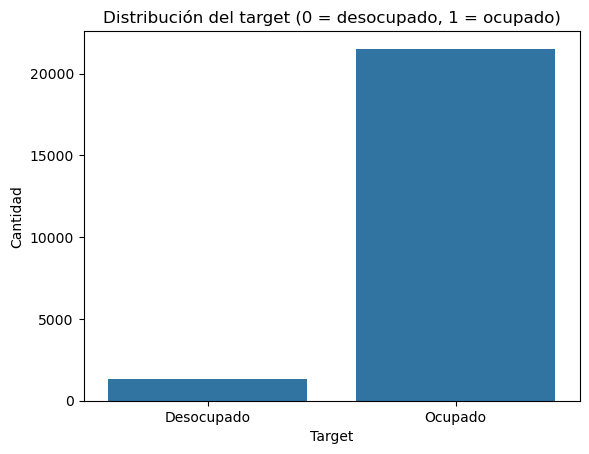

In [21]:
sns.countplot(data=df_actividad, x='target')
plt.title('Distribución del target (0 = desocupado, 1 = ocupado)')
plt.xlabel('Target')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['Desocupado', 'Ocupado'])
plt.show()

🔵 Paso 6: Dividir el dataset en entrenamiento y prueba

In [24]:
from sklearn.model_selection import train_test_split

# Separar variables predictoras (X) de la variable objetivo (y)
X = df_modelo.drop(columns='target')
y = df_modelo['target']

# Dividir en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar tamaños de los conjuntos
print("Conjunto de entrenamiento:", X_train.shape)
print("Conjunto de prueba:", X_test.shape)

Conjunto de entrenamiento: (18272, 4)
Conjunto de prueba: (4568, 4)
